<a href="https://colab.research.google.com/github/soohyoen/artificial-intelligence/blob/main/ml_16_%EB%B9%84%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5_PCA_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 코렙에서 한글 사용

In [1]:
!apt -qq -y install fonts-nanum
 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
 
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 148492 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...




```
# Windows 한글
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
```



### 구글드라이브 연동

In [2]:
# 구글드라이브 연동
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

# 구글 드라이브 파일 확인
!ls '/gdrive/My Drive/temp/'

# 반복되는 드라이브 경로 변수화
drive_path = '/gdrive/My Drive/temp/'

Mounted at /gdrive
bmi_500.csv  diabetes.csv  titanic.xls	train.csv


In [3]:
# 경고메시지 무시
import warnings
warnings.filterwarnings("ignore")

In [5]:
!pip install mglearn

# 비지도 학습(Unsupervised Learning)

- 데이터에 대한 Label(명시적인 답)이 주어지지 않은 상태에서 컴퓨터를 학습시키는 방법
- 입력에 대한 정답을 찾는 것이 아닌 입력데이터의 패턴, 특성 등을 학습을 통해 발견하는 방법
- 데이터를 비슷한 특성끼리 묶는 군집과 차원축소로 나누어짐

<center>
 <img src="https://artisansasylum.com/wp-content/uploads/2019/09/machine-learning-info.png" alt="머신러닝종류" width="80%" />

머신러닝종류

</center>

<center>

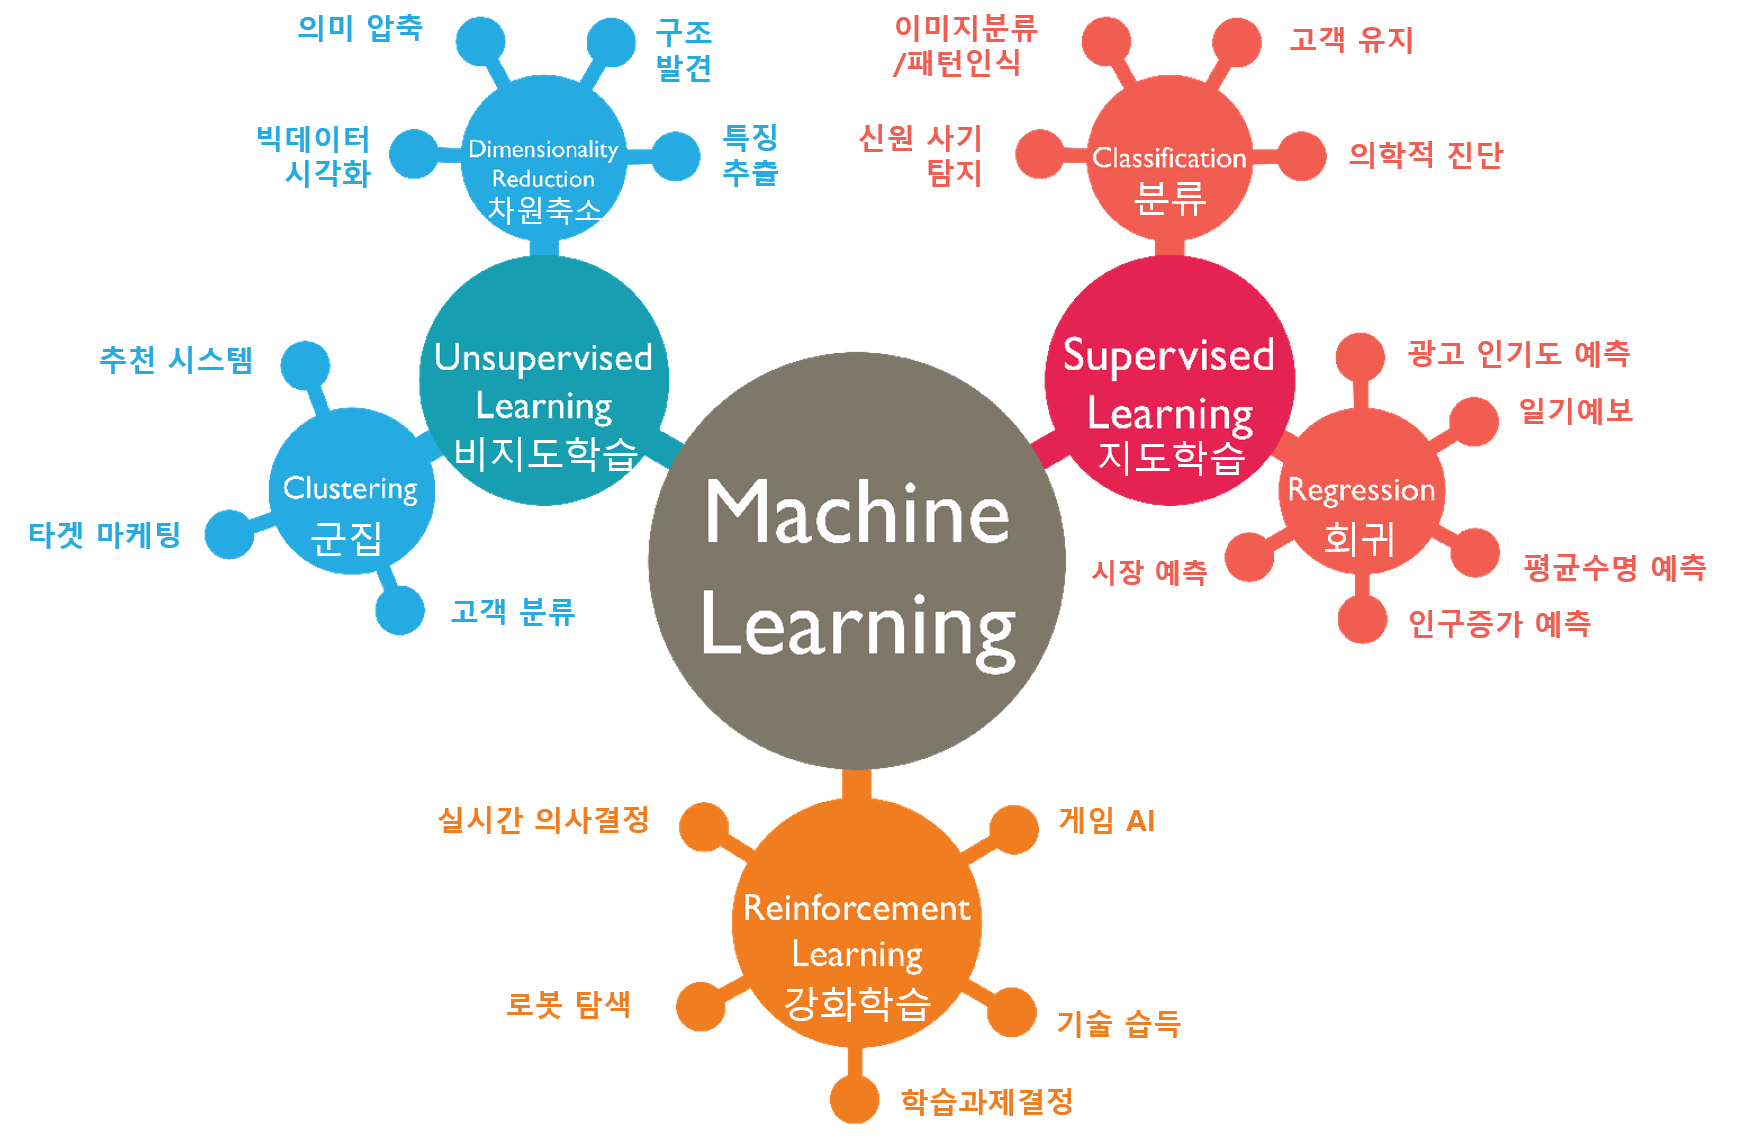
</center>

비지도학습 사용 이유

- 시각화, 데이터 압축, 추가적인 처리를 위해 정보가 더 잘 드러나는 표현을 찾기 위함
- 데이터 과학자들이 데이터를 더 잘 이해하고 싶을 때 탐색적 분석 단계에서 많이 사용
- 지도학습의 전처리 단계에서 활용 : 비지도 학습으로 새롭게 표현된 데이터를 사용해 지도 학습을 수행하면 정확도가 높아지고 메모리 및 시간을 절약할 수 있음.
- 스케일링 메소드 → 비지도 방식

단점

- 알고리즘이 유용한 것을 학습했는지 평가하기 어려움 → 레이블이 없는 데이터이므로
- 해당 결과를 직접 확인하는 것이 유일한 방법일 때가 있음


차원 축소 (Dimension Reduction) or 변환 (Transformation)

- 데이터를 새롭게 표현하여 사람이나 다른 머신러닝 알고리즘이 원래 데이터보다 쉽게 해석할 수 있도록 만드는 작업
- 고차원 데이터의 특성의 수를 줄이면서 필요한 특징을 포함한 데이터로 표현 (3차원 -> 2차원)
- 데이터를 구성하는 단위나 성분을 찾아서 표현 (텍스트 문서에서 주제 검색)

군집 (Clustering)

- 동일한 그룹(클러스터)의 개체가 다른 그룹의 개체보다 서로 비슷하도록 개체 집합을 그룹화하는 작업
- 분류 알고리즘과 비슷하게 각 데이터 포인트가 어느 클래스에 속하는지 예측(할당)
- (예) 업로드한 사진을 분류하기 위해 비슷한 사람끼리 묶는 작업

비지도 학습의 군집, 밀도 추정, 공간 변환

- 군집 : 유사한 샘플을 모아 같은 그룹을 묶음 (맞춤광고, 영상분할,유전자 분석, SNS 검색어 분석 등)
- 밀도 추정 : 데이터로부터 확률분포를 추정하는 일 (분류, 생성 모델 구축 등)
- 공간 변환 : 원래 특징 공간을 저차원 또는 고차원 공간으로 변환하는 일 (데이터시각화, 압축, 특징추출 등)

<center>
군집, 밀도 추정, 공간 변환
</center>

<center>

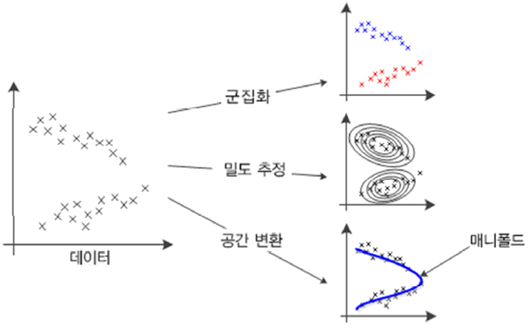

</center>

# 차원축소(Dimension Reduction)




차원(Dimension)
- 1차원이 직선, 2차원이 평면, 3차원이 이른바 공간인 것처럼 독립적으로 취할 수 있는 좌표축의 수.

- 우리가 다뤄야할 데이터안의 특성(컬럼) 한 개 한 개가 독립적인 차원인 것!

- 데이터를 분석하기 위해서 기본이 되는 단위.


차원의 저주(Curse of Dimensionality) 

- 고차원 공간을 직관적으로 상상하기 어려움
 > 1000차원의 공간에서 휘어져 있는 200차원의 타원체는?

 > 기본적인 4차원의 초입방체(hypercube)는?

- 데이터가 고차원이 될수록 데이터 공간의 부피가 기하급수적으로 증가, 데이터 밀도는 희소(sparse)해짐

- 차원이 증가할수록 데이터 간의 거리가 멀어짐 → 데이터가 분산될 가능성이 높음 → 과대적합 증가

- 해결방안 : 데이터의 밀도가 높아질 때까지 데이터 확보
→ 필요 데이터가 기하급수적으로 증가하는 문제 발생


차원축소(Dimensionality Reduction) 

- MNIST 데이터에서 검정색 부분의 특성은 줄여도 학습하는데 큰 문제가 없음 → 차원축소

- 즉, 데이터의 의미를 제대로 표현하는 특징을 추려내는 것!

- 차원축소를 통해 시간 단축 및 메모리 사용 효율성 증대
→ 단! 잘못 사용하면 중요 특성이 사라져 성능이 저하될 수 있음


#### 차원축소 방법



투영 (Projection)

- 3차원 공간상의 데이터를 2차원 부분 공간으로 투영(porjection)시켜 만들어진 2D 데이터셋
<center>
 <img src="https://img1.daumcdn.net/thumb/R720x0.q80/?scode=mtistory2&fname=http%3A%2F%2Fcfile1.uf.tistory.com%2Fimage%2F99EABC3E5B8A48781BEFA4" alt="투영" width="60%" />

</center>


## 주성분분석 (PCA, Principal Component Analysis)

- 여러 변수 간에 존재하는 상관관계를 이용해 이를 대표하는 주성분(Principal Component)을 추출해 차원을 축소하는 기법

- 가장 높은 분산을 가지는 데이터의 축을 찾아 이 축으로 차원을 축소 (주성분)

 - 분산이 데이터의 특성을 가장 잘 나타내는 것으로 간주

- 죄표축을 기준으로 차원 축소? → 점들이 겹치면 정보유실

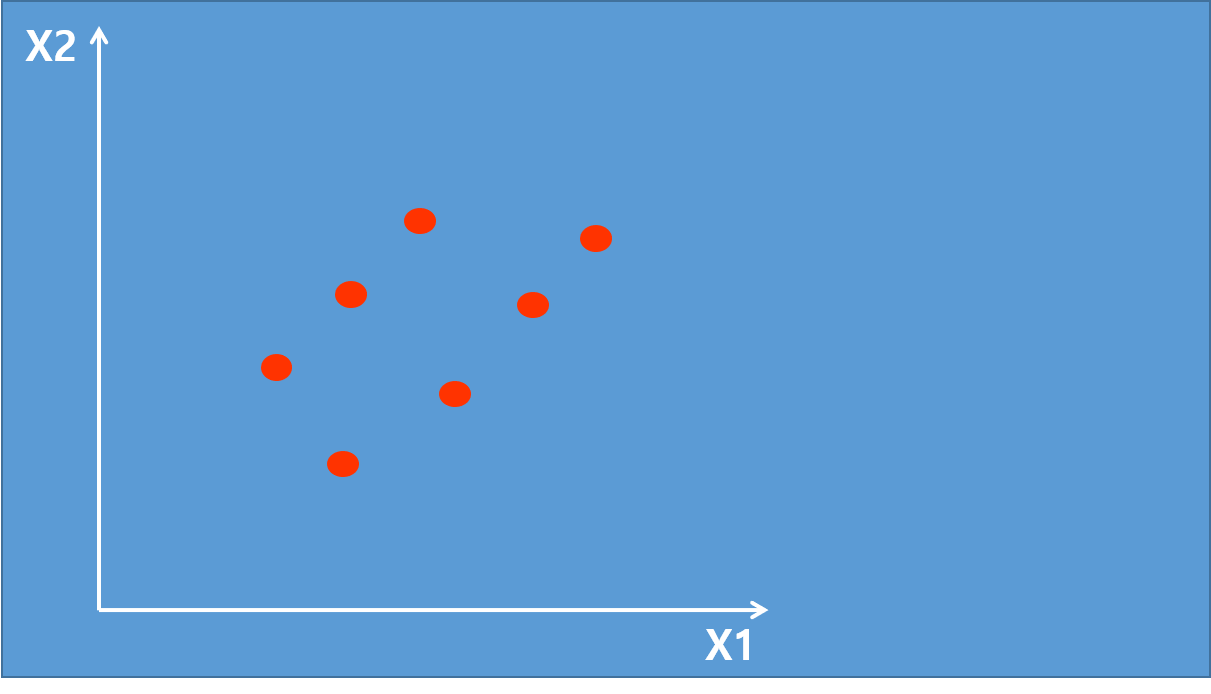

- 데이터의 분산이 가장 큰 방향으로 축 생성
- 주성분(Principal Component) : 주된 분산의 방향

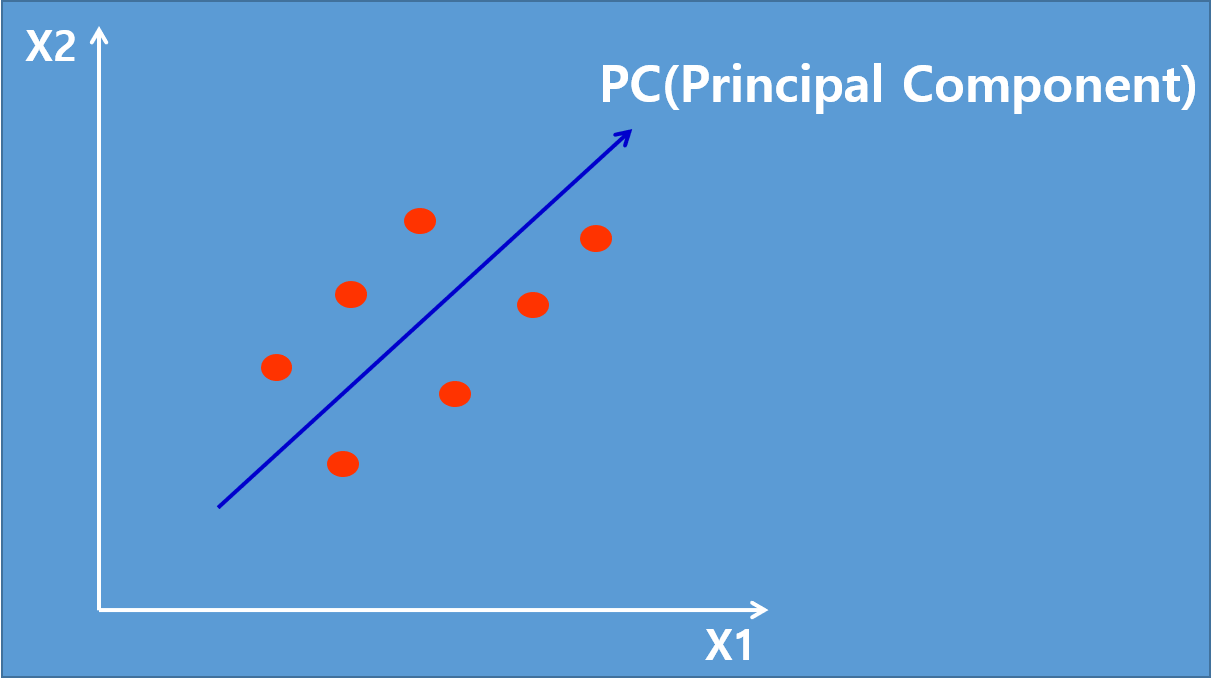

- 새로운 축으로 데이터 투영

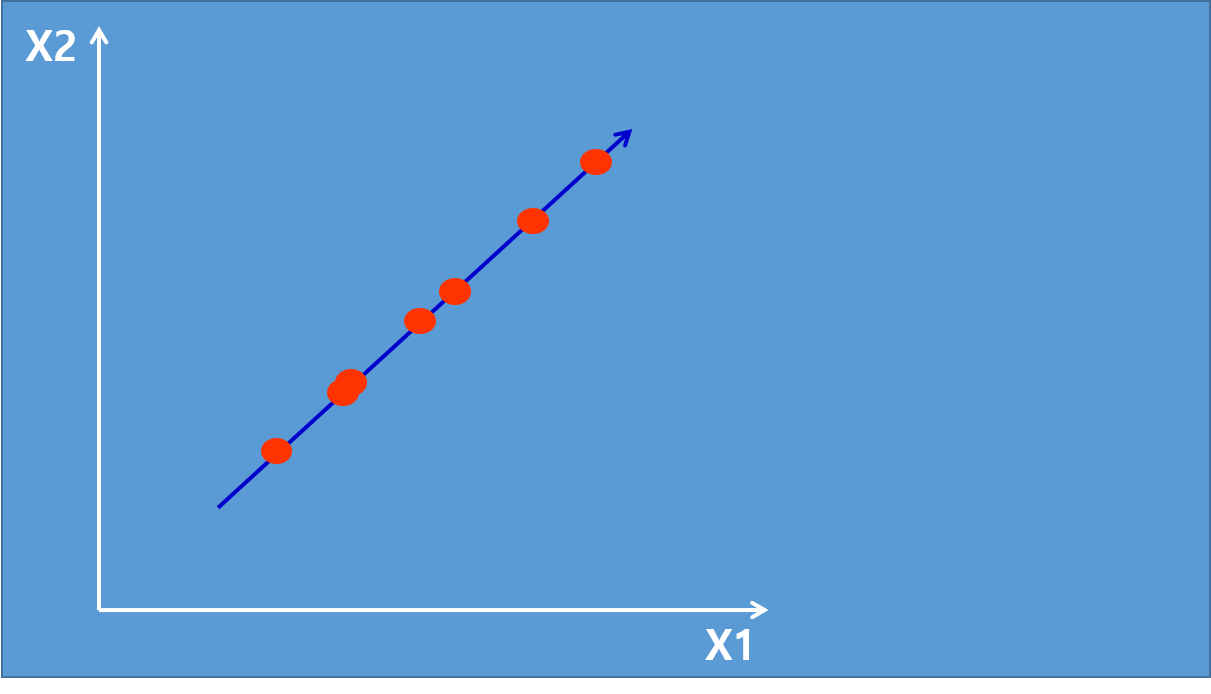

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


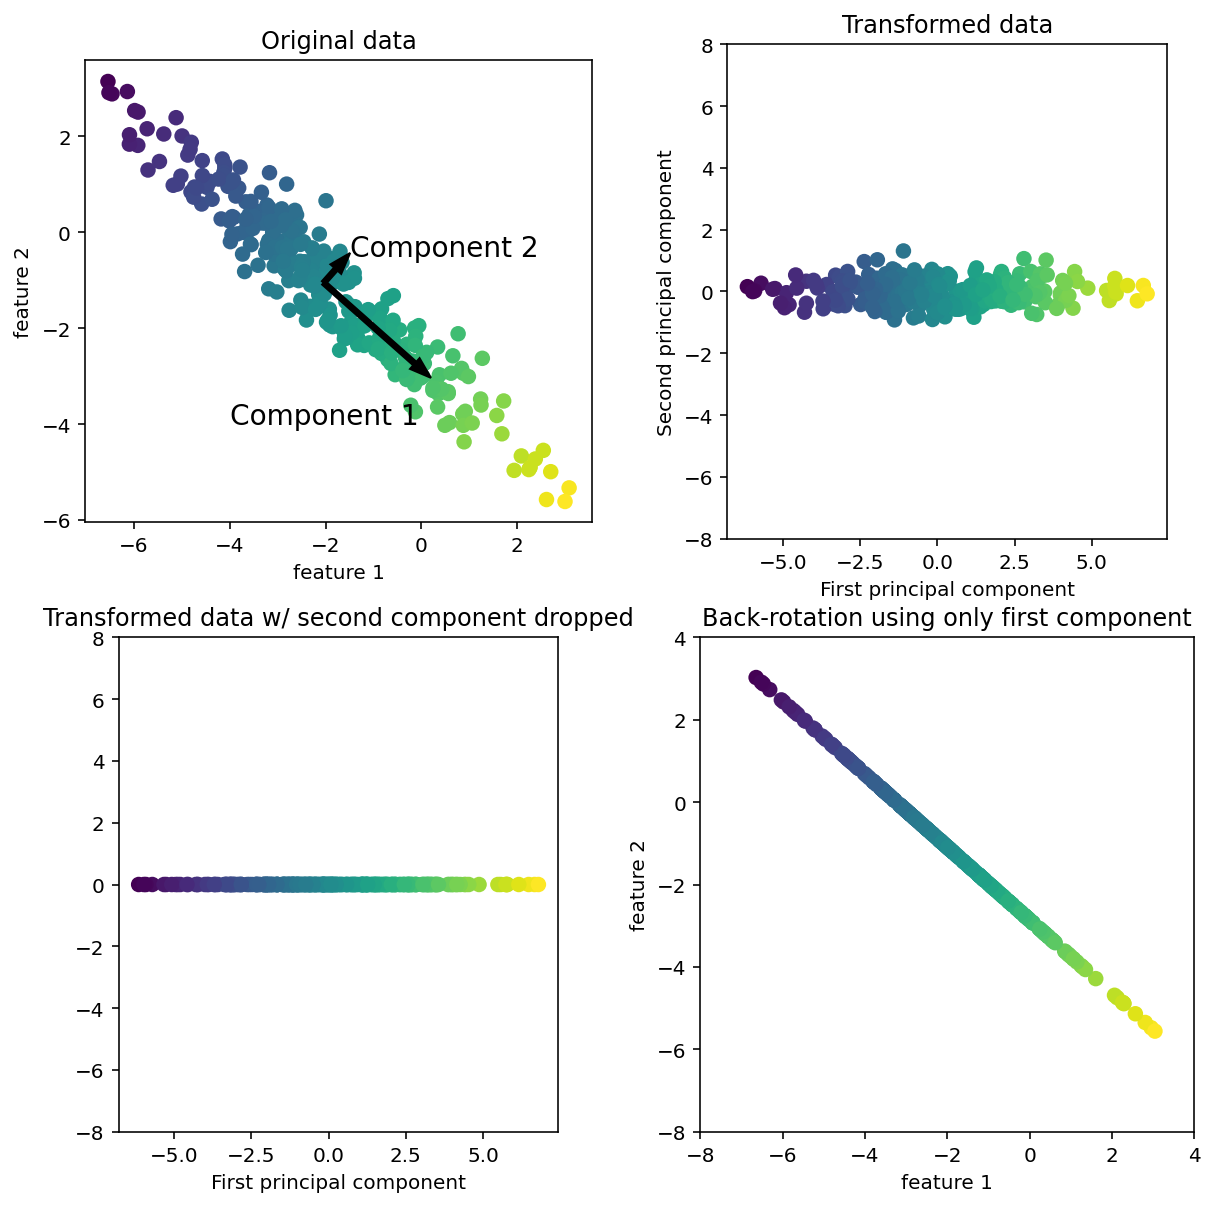

In [6]:
# PCA를 이용한 데이터 변환
import mglearn
mglearn.plots.plot_pca_illustration()

- 데이터에서 노이즈를 제거하거나 주성분에서 유지되는 정보를 시각화하는데 이용
- PCA가 가장 널리 사용되는 분야는 고차원 데이터셋의 시각화
  - 3개 이상의 특성을 가진 데이터를 산점도로 표현하기 어려움

#### PCA 실습 01

고차원 데이터셋의 시각화
- 유방암 데이터셋 시각화

In [7]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


- 산점도를 그리려면
> 30개 특성에서 2개씩 짝짓게 되므로
>\begin{equation} \begin{pmatrix} 30 \\ 2 \end{pmatrix}=\frac { 30! }{ 2!(30-2)! } =30\times \frac { 29! }{ 2!\times 28! } = 30\times 14.5=435 \end{equation}

- 각 특성의 히스토그램을 그림


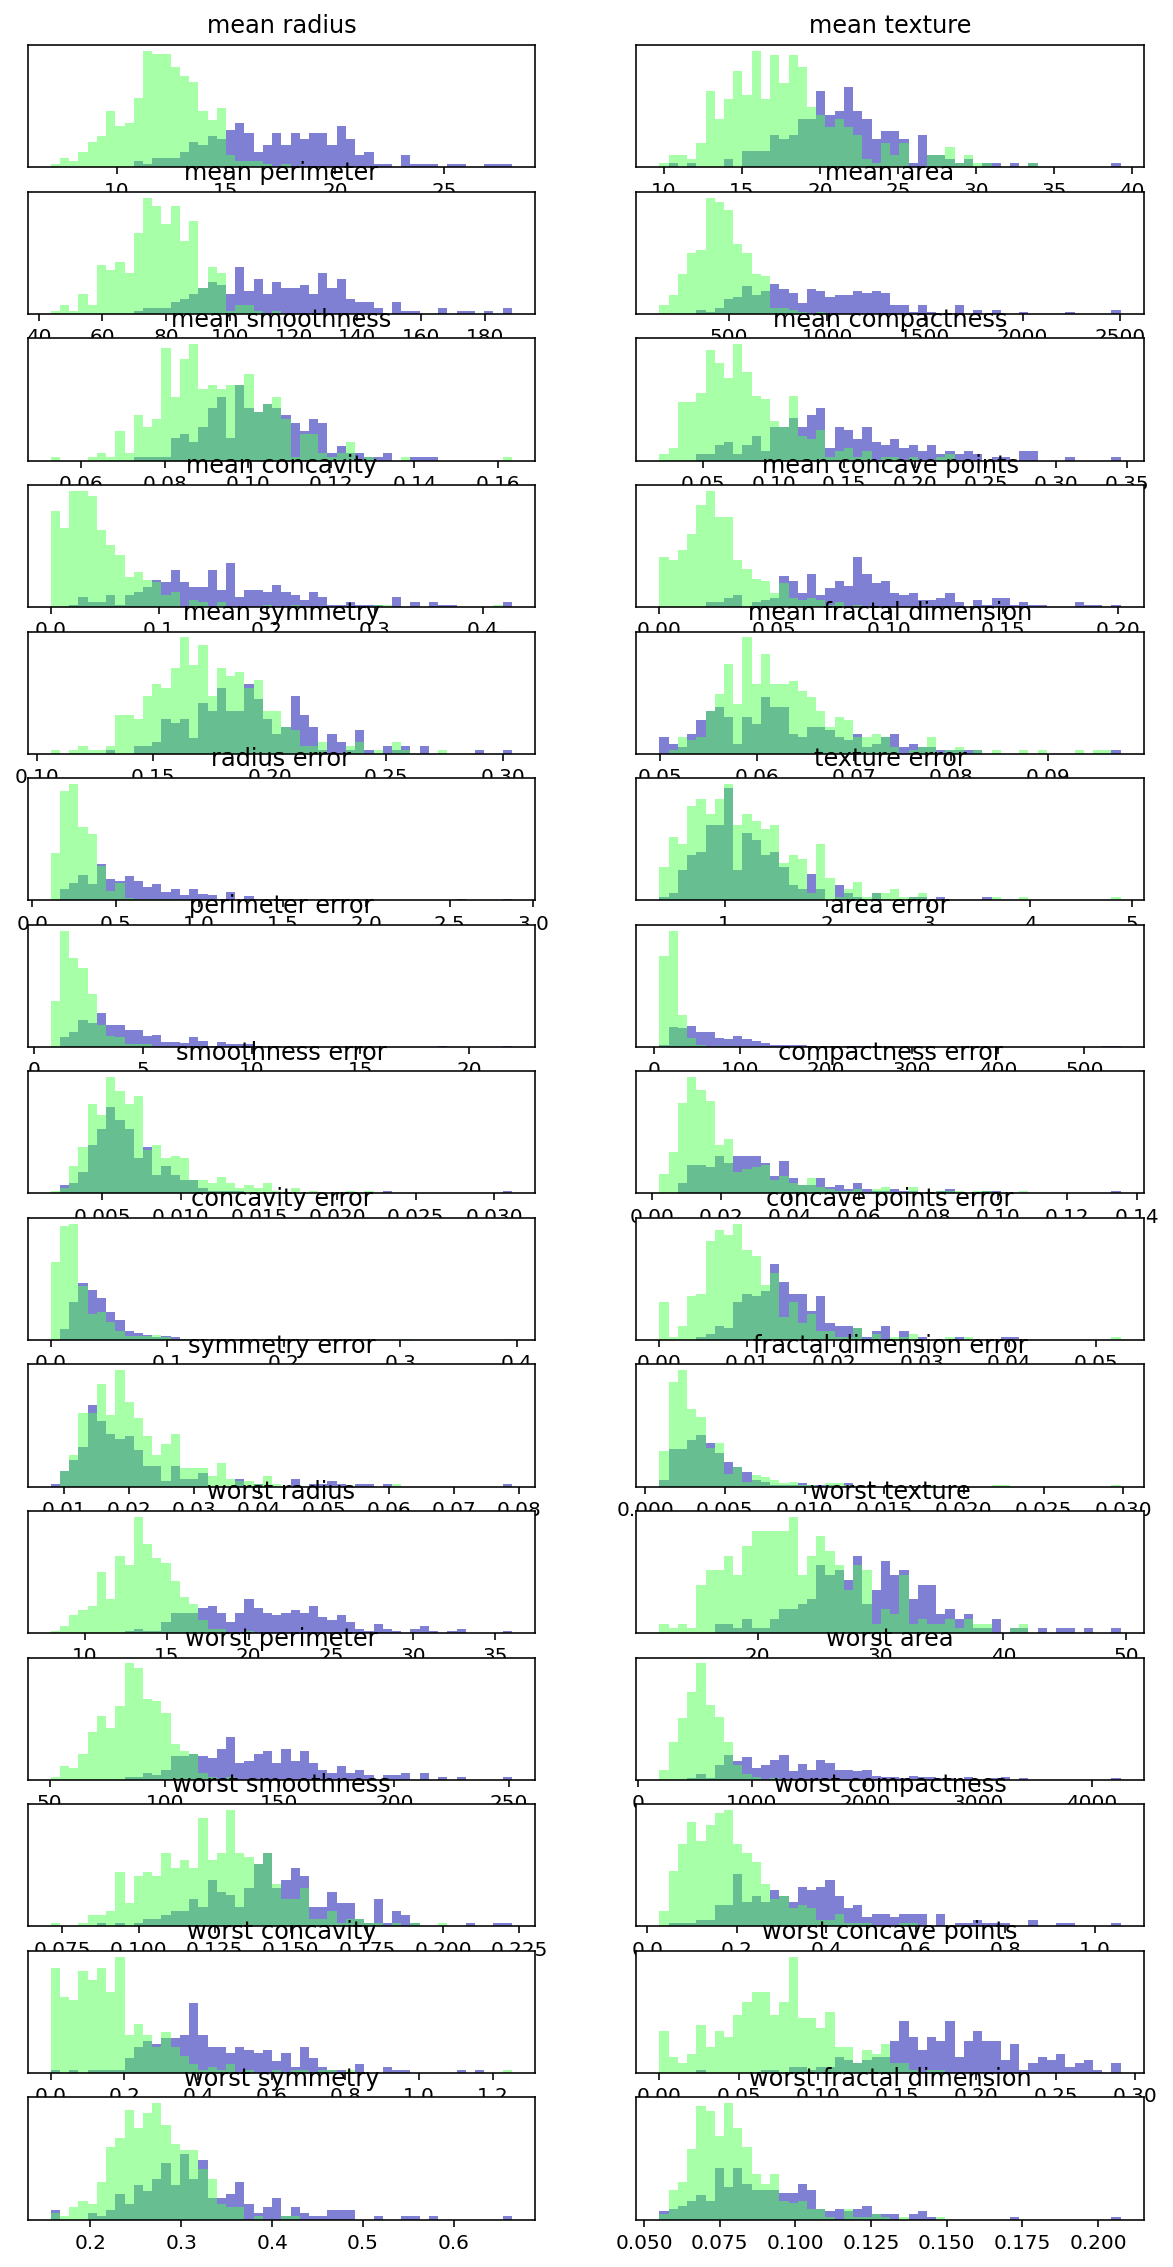

In [8]:
import mglearn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

fig, axes = plt.subplots(15, 2, figsize=(10, 20))
ax = axes.ravel()

for i in range(30):
  _, bins = np.histogram(cancer.data[:, i], bins=50)
  ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=0.5)
  ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=0.5)
  ax[i].set_title(cancer.feature_names[i])
  ax[i].set_yticks(())

- 초록색은 양성, 푸른색은 악성
- 특성들이 클래스별로 어떻게 분포되어 있는지 파악
- 어떤 특성이 양성과 악성 샘플을 구분하는데 더 좋은지 파악

- 특성 간의 상호작용이나 이 상호작용이 클래스와 어떤 관련이 있는지 알 수 없음

PCA를 적용

In [9]:
# 특성의 분산이 1이 되도록 데이터의 스케일을 조정
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer

# 데이터로드
cancer = load_breast_cancer()

# 스케일 조정
X_scaled = StandardScaler().fit_transform(cancer.data)
X_scaled.shape

(569, 30)

In [10]:
from sklearn.decomposition import PCA

pca =PCA(n_components = 2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
X_pca.shape

(569, 2)

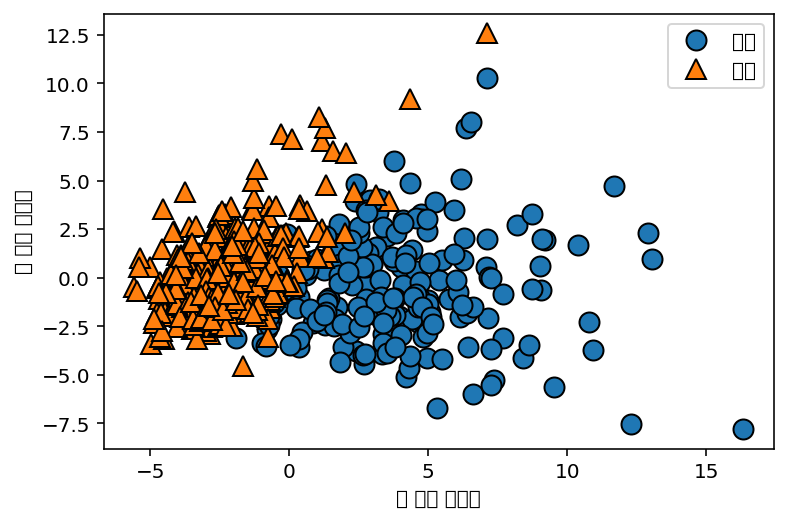

In [11]:
# 클래스를 색깔로 구분하여 처음 두 개의 주성분을 그래프로 시각화
mglearn.discrete_scatter(X_pca[:,0], X_pca[:,1],cancer.target)
plt.legend(['악성','양성'])
plt.xlabel('첫 번째 주성분')
plt.ylabel('두 번째 주성분')
plt.show()

In [12]:
pca.components_.shape

(2, 30)

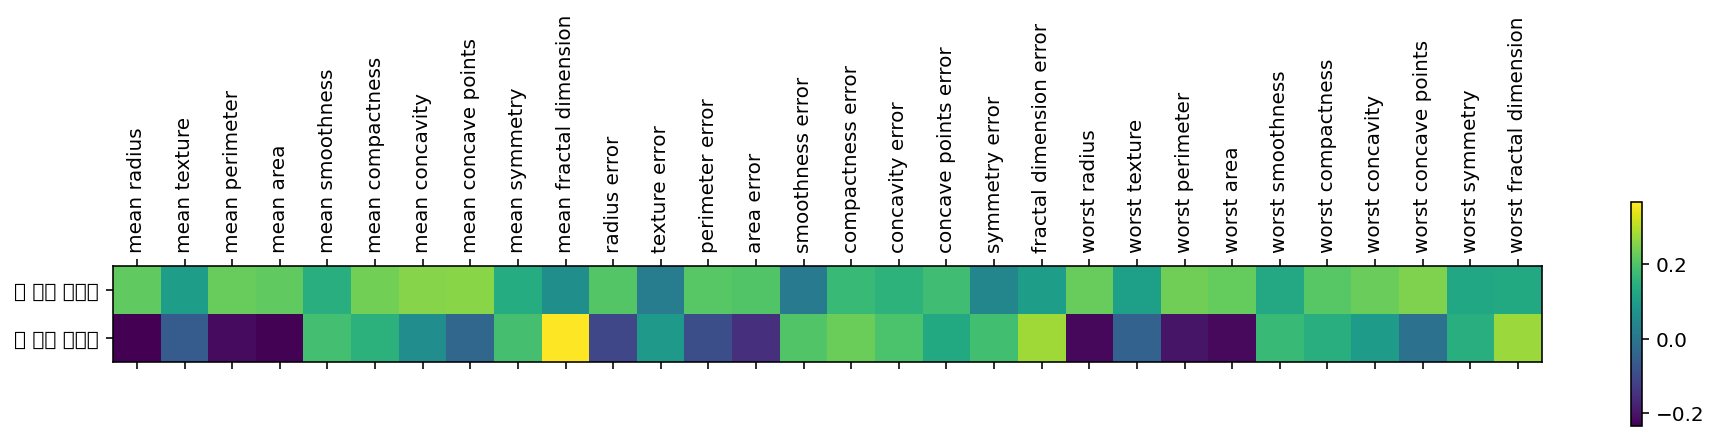

In [13]:
# 주성분 값을 히트맵으로 시각화
plt.matshow(pca.components_,cmap='viridis')
plt.colorbar()
plt.yticks([0,1],['첫 번째 주성분', '두 번째 주성분'])
plt.xticks(range(30),cancer.feature_names,rotation=90)
plt.show()

#### PCA 실습 02

데이터셋 압축
- 붓꽃 데이터셋의 속성 4가지를 2개로 압축

In [14]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()

df = pd.DataFrame(iris.data ,columns = iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


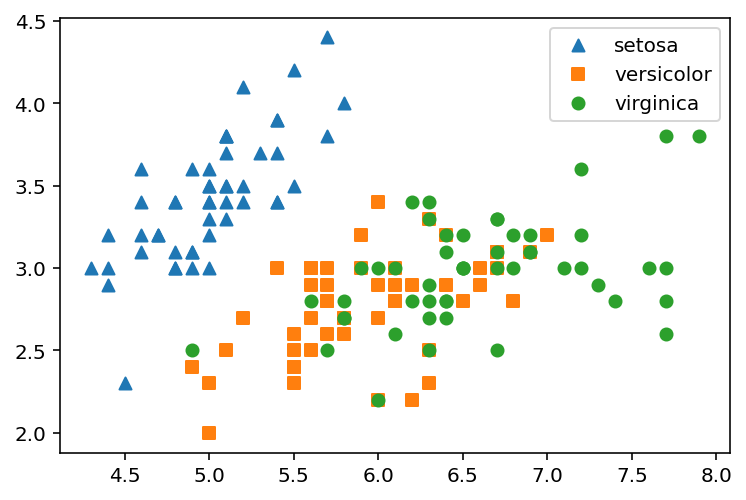

In [15]:
#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
# setosa의 target 값은 0, versicolor는 1, virginica는 2.
# 각 target 별 산점도 
markers=['^','s','o']
for i, marker in enumerate(markers):
  x_data= df[df['target'] == i]['sepal length (cm)']
  y_data= df[df['target'] == i]['sepal width (cm)']
  plt.scatter(x_data,y_data,marker=marker, label=iris.target_names[i])

plt.legend()
plt.show()

PCA를 이용한 압축 적용

In [16]:
# PCA적용 전 개별 속성을 스케일링
# StandardScaler를 이용하여 표준 정규 분포를 가지는 값들로 변환
from sklearn.preprocessing import StandardScaler

X= df.iloc[:, :-1]
X_scaled = StandardScaler().fit_transform(X)

In [17]:
# PCA 변환
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(X_scaled)
X_pca = pca.transform(X_scaled)
X_pca.shape

(150, 2)

In [18]:
# PCA 변환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns = ['pca_component_1', 'pca_component_2']
df_pca = pd.DataFrame(X_pca, columns=pca_columns)
df_pca['target'] = iris.target
df_pca.head()

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


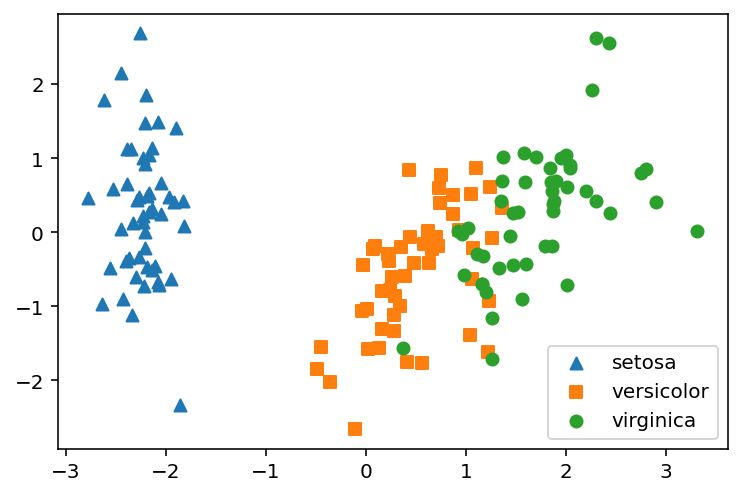

In [19]:
#setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
#pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행. 

markers=['^','s','o']
for i, marker in enumerate(markers):
  x_data= df_pca[df_pca['target'] == i]['pca_component_1']
  y_data= df_pca[df_pca['target'] == i]['pca_component_2']
  plt.scatter(x_data,y_data,marker=marker, label=iris.target_names[i])

plt.legend()
plt.show()

In [20]:
# 분산 비율 확인
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [21]:
# 4차원 데이터를 2차원으로 PCA 변환한 데이터 세트에 램덤 포레스트 적용
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

model = RandomForestClassifier(random_state=0)
scores = cross_val_score(model, iris.data,iris.target,scoring='accuracy', cv=5)
print(scores.mean(), scores)

0.9666666666666668 [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]


In [22]:
scores = cross_val_score(model,X_pca,iris.target,scoring='accuracy', cv=5)
print(scores.mean(), scores)

0.9 [0.83333333 0.93333333 0.83333333 0.9        1.        ]


#### PCA 실습 03

특성 추출에 이용
- 고유얼굴 특성 추출
- 2000년 초반 이후의 정치인, 가수, 배우, 운동선수들의 얼굴을 포함한 LFW 데이터셋 이용


In [23]:
from sklearn.datasets import fetch_lfw_people

people = fetch_lfw_people(min_faces_per_person=20,resize=0.7)

(87, 65)
(5655,)


'Winona Ryder'

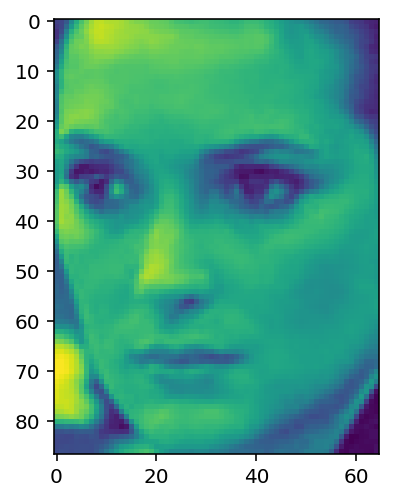

In [24]:
people.keys()
print(people.images[0].shape)
print(people.data[0].shape)
plt.imshow(people.images[0])
people.target[0]
people.target_names[people.target[0]]

In [31]:
import numpy as np
# 각 타깃이 나타난 횟수 계산
# 타깃별 이름과 횟수 출력
print(people.images.shape)
np.bincount(people.target)

(3023, 87, 65)


array([ 39,  35,  21,  36,  20,  77,  42,  24,  29,  21, 236,  31, 121,
        22, 530, 109,  44,  26,  30,  22,  39,  71,  20,  28,  52,  55,
        21,  42,  21,  24,  20,  53,  31,  23,  28,  60,  32,  41,  22,
        41,  48,  29,  33,  20,  22,  37,  20,  22,  30,  27,  32,  26,
        23,  52,  33,  23,  25,  33, 144,  32,  49,  24])

In [37]:
np.unique(people.target)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61])

In [43]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
  mask[np.where(people.target == target)[0][:50]] = 1

X = people.data[mask]
y = people.target[mask]

print( X.shape, y.shape )

X = X / 255.  # minmax

(2063, 5655) (2063,)


- 얼굴인식 : 새로운 얼굴이 기존 얼굴 중 하나에 속하는지 찾는 작업 
- 사람 수는 많으나 각 사람에 대한 이미지가 적기 때문에 클래스별 훈련 데이터가 적음
- 분류하려는 얼굴과 가장 비슷한 얼굴 이미지를 찾는 KNN을 이용

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify=y, 
                                                    random_state=0)
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.23255813953488372

- PCA의 화이트닝(백색화) 옵션을 사용해서 주성분의 스케일이 같아지도록 조정
  - StandardScaler을 적용한 것과 동일

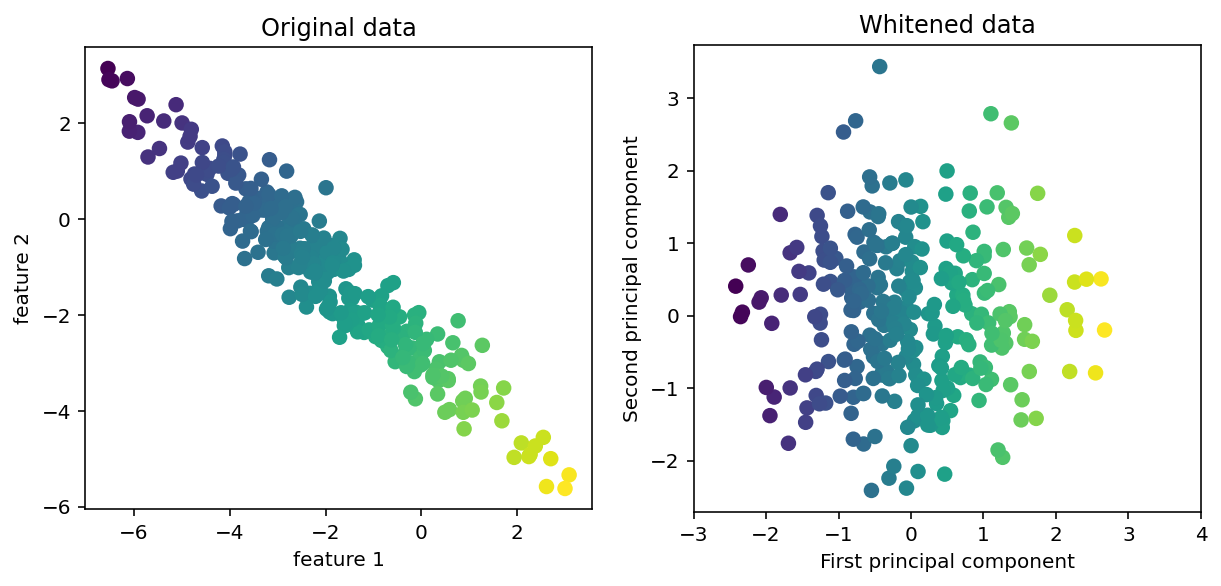

In [27]:
mglearn.plots.plot_pca_whitening()

- 데이터 회전과 스케일이 조정되어 타원이 아닌 원 모양으로 바뀜

In [45]:
# 100개의 주성분을 추출
from sklearn.decomposition import PCA

pca = PCA(n_components=100, whiten=True, random_state=0)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
X_train_pca.shape , X_test_pca.shape

((1547, 100), (516, 100))

In [46]:
# 이미지 분류
model_pca = KNeighborsClassifier(n_neighbors=1)
model_pca.fit(X_train_pca,y_train)
model_pca.score(X_test_pca,y_test)

0.312015503875969


- 주성분이 데이터를 더 잘 표현한다고 직관적 판단이 가능

(100, 5655)


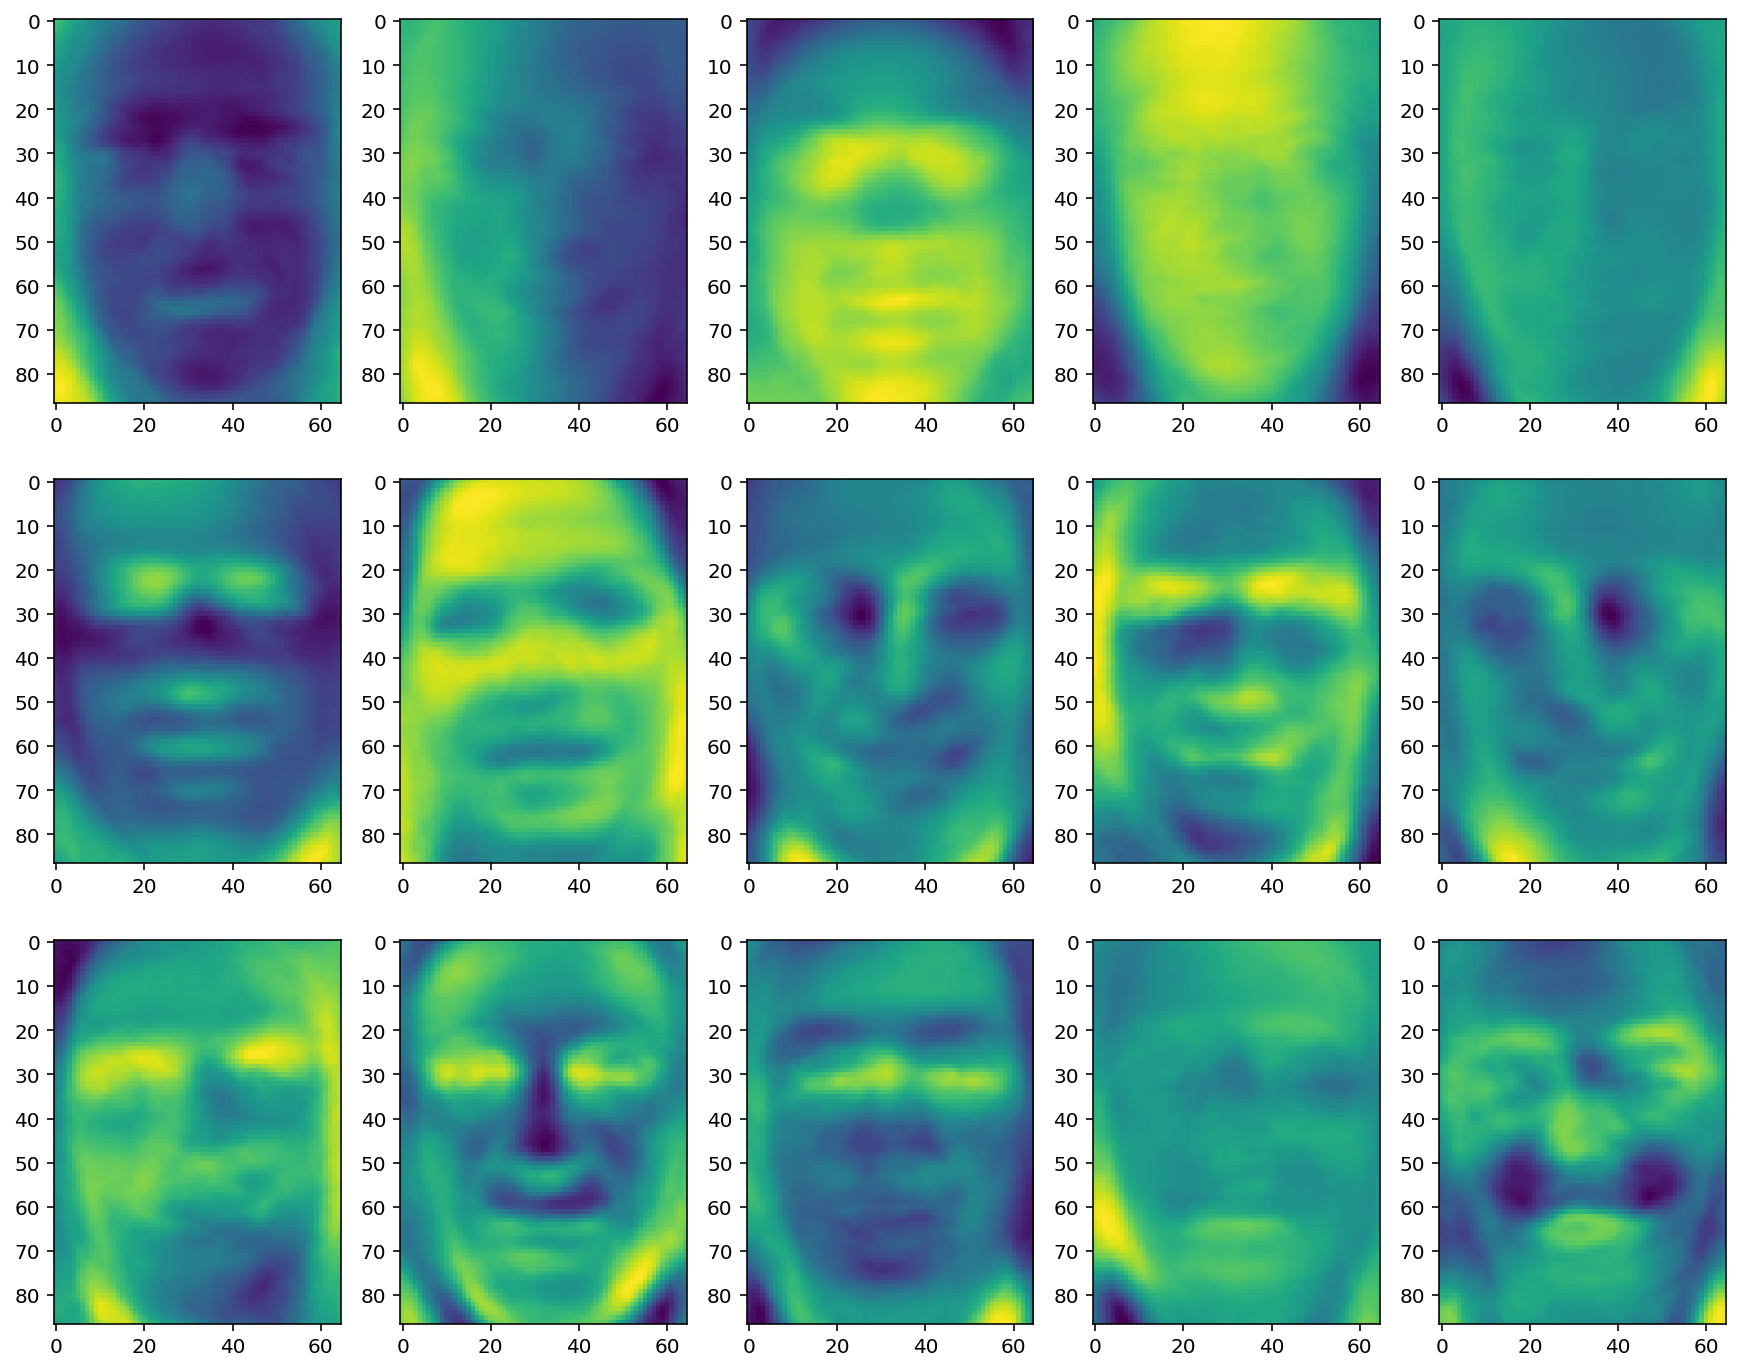

In [51]:
# 주성분 처음 15개를 확인
print(pca.components_.shape)

fig, axes = plt.subplots(3,5,figsize=(15,12))

ax = axes.ravel()

for i in range(15):
  ax[i].imshow(pca.components_[i].reshape(87,65))

- 첫 번째 주성분은 얼굴과 배경의 명암 차이를 기록
- 두 번째 주성분은 오른쪽과 왼쪽 조명의 차이를 기록
- 사람이 인지하는 방식과 알고리즘이 데이터를 해석하는 방식이 다름
 - 사람은 나이, 성별, 표정, 머리 모양 같은 픽셀의 강도로 표현하기 어려운 속성을 사용
 - PCA 모델은 픽셀을 기반으로 얼굴의 배치와 조명 등의 속성을 사용